<a href="https://colab.research.google.com/github/dianicgr/An-lisis-Geoespacial/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
echo "# An-lisis-Geoespacial" >> README.md
git init
git add README.md
git commit -m "primer commit"
git branch -M main
git remote add origin https://github.com/dianicgr/An-lisis-Geoespacial.git
 git push -u origin main

SyntaxError: invalid syntax (ipython-input-33-1280927739.py, line 1)

**Uso de Plaguicidas Departamento de Santander**

**Visualización de datos discretos**

*Regresión Lineal (Binomial)*

In [22]:
# Instalar librerías si no están
!pip install geopandas statsmodels

import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
from google.colab import files

# Subir archivo .geojson
uploaded = files.upload()
filename = "Poligonos_Centroides.geojson"

# Cargar archivo (sin geometría)
df = gpd.read_file(filename, ignore_geometry=True)

# ✅ 1. Codificar variable dependiente: 1 = "si", 0 = "no"
df["usoplaguic"] = df["usoplaguic"].str.lower().map({"si": 1, "no": 0})

# ✅ 2. Seleccionar variables predictoras (elige las que desees)
predictoras = ["Valor_AF", "Valor_Crbm", "Valor_Orgf"]  # puedes agregar más

# ✅ 3. Eliminar filas con valores nulos
df_modelo = df[["usoplaguic"] + predictoras].dropna()

# ✅ 4. Definir variables X (predictoras) y Y (respuesta)
X = df_modelo[predictoras]
X = sm.add_constant(X)  # Agregar intercepto
y = df_modelo["usoplaguic"]

# ✅ 5. Ajustar modelo de regresión logística
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# ✅ 6. Ver resumen del modelo
print(resultado.summary())

# ✅ 7. Interpretación rápida: odds ratio
import numpy as np
odds_ratios = np.exp(resultado.params)
print("\nOdds Ratios:")
print(odds_ratios)


Saving Poligonos_Centroides.geojson to Poligonos_Centroides (15).geojson
         Current function value: 0.042124
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             usoplaguic   No. Observations:                  135
Model:                          Logit   Df Residuals:                      131
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.9158
Time:                        21:06:17   Log-Likelihood:                -5.6867
converged:                      False   LL-Null:                       -67.554
Covariance Type:            nonrobust   LLR p-value:                 1.210e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6821      1.005     -4.661      0.000      -6.651     

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


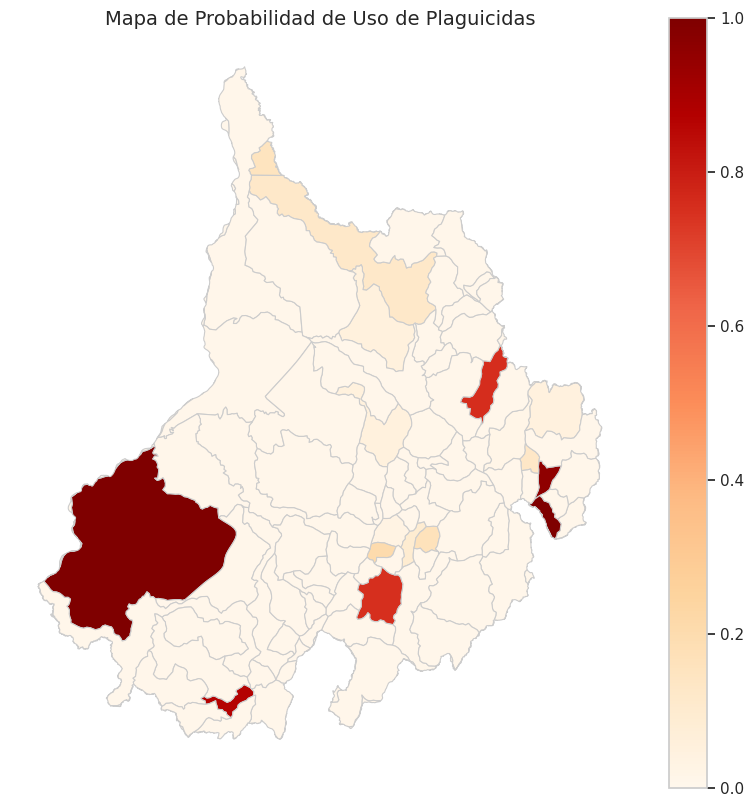

In [27]:
# 📌 Suponiendo que ya tienes cargado:
# - df: DataFrame original con geometría
# - df_modelo: DataFrame filtrado para el modelo
# - X_scaled: variables predictoras escaladas + constante
# - resultado: modelo ajustado (Logit + regularizado)

import matplotlib.pyplot as plt

# Volver a cargar el archivo .geojson con geometría
gdf = gpd.read_file(filename)

# Eliminar filas con nulos en las columnas que usaste en el modelo
gdf_modelo = gdf[["usoplaguic"] + predictoras].dropna().reset_index(drop=True)

# ⚠️ Asegurarse de que gdf_modelo y X_scaled tengan la misma cantidad de filas y orden
assert len(gdf_modelo) == len(X_scaled)

# Obtener probabilidades predichas
y_prob = resultado.predict(X_scaled)

# Añadir la columna de probabilidad al GeoDataFrame filtrado
gdf_modelo["probabilidad_plaguicida"] = y_prob

# Unir con la geometría original
gdf_modelo["geometry"] = gdf.loc[gdf_modelo.index, "geometry"]

# Convertir a GeoDataFrame completo
gdf_resultado = gpd.GeoDataFrame(gdf_modelo, geometry="geometry", crs=gdf.crs)

# 📈 Graficar mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_resultado.plot(
    column="probabilidad_plaguicida",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    vmin=0,
    vmax=1
)
ax.set_title("Mapa de Probabilidad de Uso de Plaguicidas", fontsize=14)
ax.set_axis_off()
plt.show()


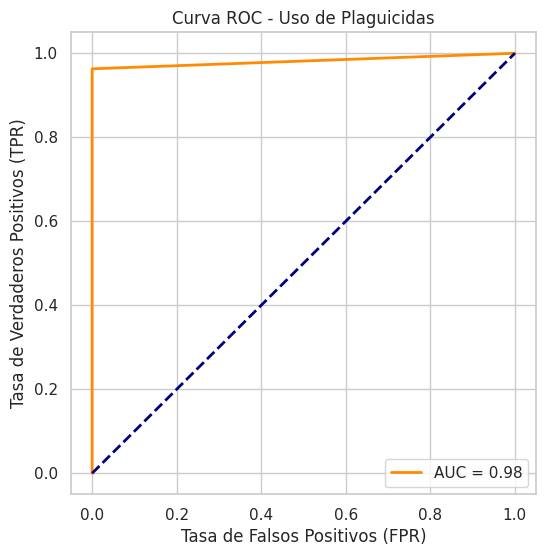

In [28]:
# Asegúrate de tener esto antes:
# - y: variable real (usoplaguic)
# - y_prob: probabilidades predichas por el modelo
# Ya generados previamente con resultado.predict(X_scaled)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 📊 Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# 🧮 Calcular el AUC
auc = roc_auc_score(y, y_prob)

# 📈 Graficar curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Uso de Plaguicidas')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### **Coropletas **

['Si' 'No']


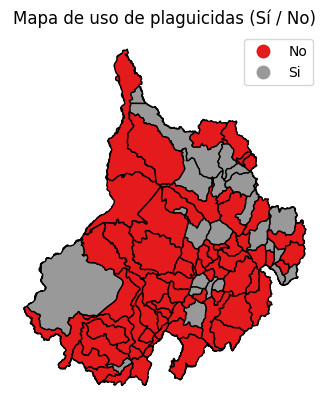

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("/content/drive/MyDrive/Analisis Geoespacial/plaguicidas_santander.gpkg")

# Revisar valores únicos para confirmar
print(gdf["usoplaguic"].unique())

# Graficar el mapa con una paleta categórica
gdf.plot(
    column="usoplaguic",
    cmap="Set1",  # Paleta de colores para categorías
    legend=True,
    edgecolor="black"
)

plt.title("Mapa de uso de plaguicidas (Sí / No)")
plt.axis("off")
plt.show()


**Histograma**

In [10]:
# Instalar librerías
!pip install geopandas seaborn

# Importar
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Subir archivo
uploaded = files.upload()

# Leer archivo sin geometría
filename = "Poligonos_Centroides.geojson"
df = gpd.read_file(filename, ignore_geometry=True)

# Asegurar Cod_dane como texto
df["Cod_dane"] = df["Cod_dane"].astype(str)

# Lista de columnas numéricas a graficar
columnas = ["Valor_AF", "Valor_Bprd", "Valor_Crbm", "Valor_Orgn",
            "Valor_Orgf", "Valor_Otro", "Valor_Ot_1"]

# Crear gráfico de barras para cada columna
for col in columnas:
    # Agrupar por municipio y calcular promedio
    promedio = df.groupby("Cod_dane")[col].mean().reset_index()

    # Graficar
    plt.figure(figsize=(12, 6))
    sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")
    plt.title(f"Promedio de {col} por municipio")
    plt.xlabel("Municipio (Cod_dane)")
    plt.ylabel(f"Promedio de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Guardar y descargar
    filename_img = f"{col}_promedio_por_municipio.png"
    plt.savefig(filename_img, dpi=300)
    files.download(filename_img)
    plt.close()


Saving Poligonos_Centroides.geojson to Poligonos_Centroides (5).geojson


/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-10-2326312491.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio, x="Cod_dane", y=col, palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Instalar geopandas si es necesario (en Google Colab)
!pip install geopandas

# Importar librerías
import geopandas as gpd
import pandas as pd

# Subir el archivo desde tu equipo
from google.colab import files
uploaded = files.upload()

# Cargar el archivo (asegúrate de usar el nombre correcto)
filename = "Poligonos_Centroides.geojson"

# Leer solo los atributos (sin geometría para evitar errores)
df = gpd.read_file(filename, ignore_geometry=True)

# Opcional: mostrar las columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Seleccionar automáticamente las columnas que empiezan con "Valor_"
columnas_valor = [col for col in df.columns if col.startswith("Valor_")]

# Generar resumen estadístico
resumen = df[columnas_valor].describe()

# Mostrar el resumen
print("\nResumen estadístico de columnas 'Valor_*':\n")
print(resumen)


Saving Poligonos_Centroides.geojson to Poligonos_Centroides (6).geojson
Columnas disponibles: ['fid', 'OBJECTID', 'Cod_dane', 'Valor_AF', 'Valor_Bprd', 'Valor_Crbm', 'Valor_Orgn', 'Valor_Orgf', 'Valor_Otro', 'Valor_Ot_1', 'usoplaguic', 'SHAPE_Leng', 'SHAPE_Area', 'RULEID', 'Longitud', 'Latitud']

Resumen estadístico de columnas 'Valor_*':

         Valor_AF  Valor_Bprd  Valor_Crbm  Valor_Orgn  Valor_Orgf  Valor_Otro  \
count  135.000000  135.000000  135.000000  135.000000  135.000000  135.000000   
mean     0.637037    0.229630    5.000000    0.051852    8.348148    0.770370   
std      3.906763    1.413901   20.736081    0.307093   36.819511    2.877968   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     43

In [13]:
# Instalar geopandas si es necesario
!pip install geopandas

# Importar librerías
import geopandas as gpd
import pandas as pd
from google.colab import files

# Subir archivo .geojson
uploaded = files.upload()

# Leer archivo (sin geometría)
filename = "Poligonos_Centroides.geojson"
df = gpd.read_file(filename, ignore_geometry=True)

# Seleccionar columnas que empiezan por "Valor_"
columnas_valor = [col for col in df.columns if col.startswith("Valor_")]

# Filtrar filas donde al menos un valor sea mayor que 0
df_filtrado = df[df[columnas_valor].gt(0).any(axis=1)]

# Mostrar número de filas resultantes
print(f"Número de registros con al menos un valor > 0: {len(df_filtrado)}")

# Resumen estadístico de los registros filtrados
resumen_filtrado = df_filtrado[columnas_valor].describe()
print("\nResumen estadístico de valores > 0:\n")
print(resumen_filtrado)


Saving Poligonos_Centroides.geojson to Poligonos_Centroides (7).geojson
Número de registros con al menos un valor > 0: 27

Resumen estadístico de valores > 0:

        Valor_AF  Valor_Bprd  Valor_Crbm  Valor_Orgn  Valor_Orgf  Valor_Otro  \
count  27.000000   27.000000   27.000000   27.000000   27.000000   27.000000   
mean    3.185185    1.148148   25.000000    0.259259   41.740741    3.851852   
std     8.380550    3.034465   41.192792    0.655896   74.427865    5.510156   
min     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     0.000000    0.000000    5.500000    0.000000    5.500000    0.500000   
50%     0.000000    0.000000   12.000000    0.000000   18.000000    2.000000   
75%     3.500000    1.000000   20.500000    0.000000   33.500000    4.500000   
max    43.000000   15.000000  181.000000    3.000000  338.000000   19.000000   

       Valor_Ot_1  
count   27.000000  
mean     5.814815  
std     12.670490  
min      0.000000  
25%      0.000000  

In [32]:
# Instalar librerías si no están
!pip install geopandas

import geopandas as gpd

# 📂 1. Cargar el archivo original con geometría
ruta_entrada = "/content/drive/MyDrive/Analisis Geoespacial/Coberturas_Santander.gpkg"  # ajusta si estás en otra ruta
gdf = gpd.read_file(ruta_entrada, layer="Coberturas_Santander")

# 🧠 2. Clasificar leyendas
def clasificar_leyenda(valor):
    val = valor.lower()
    if "bosque" in val:
        return "Bosque"
    elif "pasto" in val:
        return "Pastos"
    elif any(x in val for x in ["laguna", "lago", "ciénaga", "río", "agua"]):
        return "Agua"
    elif any(x in val for x in ["arenal", "rocoso", "sin vegetación", "tierra desnuda"]):
        return "Tierra desnuda"
    elif "secundaria" in val or "transición" in val:
        return "Vegetación secundaria"
    elif "urbano" in val:
        return "Urbano"
    elif any(x in val for x in ["cultivo", "caña", "café", "mosaico"]):
        return "Agrícola"
    else:
        return "Otro"

# Aplicar clasificación
gdf["CLASE_GENERAL"] = gdf["leyenda"].apply(clasificar_leyenda)

# 💾 3. Exportar como GeoJSON
ruta_salida = "/content/Coberturas_Santander_clasificado.geojson"
gdf.to_file(ruta_salida, driver="GeoJSON")

print(f"✅ Archivo exportado como GeoJSON en: {ruta_salida}")


DataSourceError: sqlite3_prepare_v2(SELECT COUNT(*) FROM sqlite_master WHERE name IN ('gpkg_metadata', 'gpkg_metadata_reference') AND type IN ('table', 'view')) failed: database disk image is malformed; database disk image is malformed